In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
# Import data
GINCO_train = pd.read_csv("data/SI_GINCO_train.csv")
GINCO_test = pd.read_csv("data/SI_GINCO_test.csv")

CORE_train = pd.read_csv("data/CORE_train.csv")
CORE_test = pd.read_csv("data/CORE_test.csv")

print(f"GINCO train-test: {len(GINCO_train.text), len(GINCO_test.text)}, CORE train-test: {len(CORE_train.text), len(CORE_test.text)}")

GINCO train-test: (486, 162), CORE train-test: (20908, 6970)


In [3]:
GINCO_train.head()

,text,labels
0,PES - BITJE ZA OSAMLJENE? <p/> Življenje z živ...,Opinion/Argumentation
1,Predelne stene <p/> Pogosto se zgodi da pri gr...,Promotion
2,V Izoli se je končal 9. mednarodni turnir v go...,News
3,Okvirji za vaše plakate <p/> Pri naročilu okvi...,Instruction
4,"Bojijo se lakote <p/> Sto ekip, 30 evropskih m...",News


In [4]:
labels = list(CORE_train.labels.unique())
labels

['Information/Explanation',
 'Review',
 'Opinion/Argumentation',
 'News',
 'Interview',
 'Forum',
 'Promotion',
 'Instruction',
 'Prose',
 'Research Article',
 'Legal/Regulation',
 'Lyrical',
 'Recipe',
 'Script/Drama',
 'FAQ']

In [9]:
def test_train_set(train, test):
    """
    Creates arrays with train attributes (X_train), train targets (Y_train), test attributes (X_test) and test targets (Y_test) that will be used by the classifier.
Args:
- train (pandas Dataframe): train dataframe for the dataset you want to use - GINCO_train or CORE_train
- test (pandas DataFrame): test dataframe for the dataset you want to use - GINCO_test or CORE-test

    Returns: X_train, Y_train, X_test, Y_test
    """
    X_train = train.text
    Y_train = train.labels
    X_test = test.text
    Y_test = test.labels

    return X_train, Y_train, X_test, Y_test

In [21]:
X_train, Y_train, X_test, Y_test = test_train_set(CORE_train, GINCO_test)

In [22]:
# Try the Dummy Classifier, with the strategy "most_frequent" or "stratified"
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, Y_train)

#Get the predictions
y_pred = dummy_clf.predict(X_test)

In [23]:
# Compare the predictions with true values (Y_test)
microF1 = f1_score(Y_test, y_pred, labels=labels, average ="micro")
macroF1 = f1_score(Y_test, y_pred, labels=labels, average ="macro")
print(f"Micro F1: {microF1:.3f}, Macro F1: {macroF1:.3f}")


Micro F1: 0.253, Macro F1: 0.027


c:\Users\TajaK\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


([<matplotlib.axis.XTick at 0x208ae08dde0>,
 [Text(0, 0, 'Information/Explanation'),
  Text(1, 0, 'Review'),
  Text(2, 0, 'Opinion/Argumentation'),
  Text(3, 0, 'News'),
  Text(4, 0, 'Interview'),
  Text(5, 0, 'Forum'),
  Text(6, 0, 'Promotion'),
  Text(7, 0, 'Instruction'),
  Text(8, 0, 'Prose'),
  Text(9, 0, 'Research Article'),
  Text(10, 0, 'Legal/Regulation'),
  Text(11, 0, 'Lyrical'),
  Text(12, 0, 'Recipe'),
  Text(13, 0, 'Script/Drama'),
  Text(14, 0, 'FAQ')])

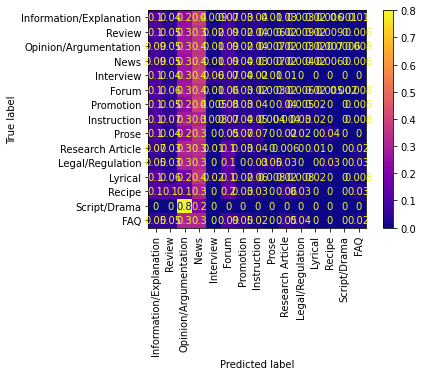

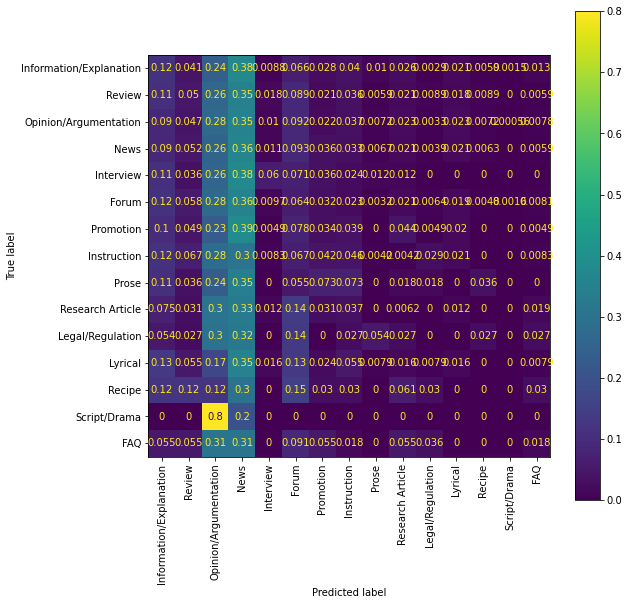

In [85]:
# Plot the confusion matrix. You can normalise the values with the attribute "normalize":
# "true" - normalize across rows, "all" = normalize by total no. of samples,
# "pred" - normalize across columns
dp = ConfusionMatrixDisplay.from_predictions(Y_test, y_pred, labels = labels, normalize="true", xticks_rotation=90, cmap='plasma', colorbar=True, values_format=".1g")

# To make the plot bigger:
fig, ax = plt.subplots(figsize=(9,9))
dp.plot(ax=ax)
plt.xticks(np.arange(len(labels)), labels, rotation=90)